# Learning Symmetric Rules with SATNet
SymSATNet is a variant of SATNet, which abbreviates symmetry-aware SATNet.
SymSATNet assumes that some symmetries of the target rules are given a priori although the rules themselves are unknown.
We incorporated the symmetries into the SATNet's objective, and derive the equivariance requirement of the paramteter matrix of SATNet.
Consequently, SymSATNet can learn with significantly reduced number of parameters using the basis elements of the space of equivariant matrices. 

For the users who cannot specify the symmetries in advance, we also presented an automatic symmetry-detection algorithm, denoted by SymFind.
The input of SymFind is the parameter matrix of SATNet learnt by a fixed number of training steps.
After refining the symmetry discovered by SymFind in an addtional validation step, we continued to train with SymSATNet initialised by the projected parameter matrix (SymSATNet-Auto).

In this code, we report the experimental results using two constraint satisfaction problems, Sudoku and the completion problem of Rubik's cube.
We compared our SymSATNet and SymSATNet-Auto with two baselines, SATNet-Plain (original SATNet with no auxiliary variables) and SATNet-300aux (original SATNet with 300 auxiliary variables).
As results, we showed the potential of SymSATNet and SymSATNet-Auto to learn faster and generalise better than SATNet-Plain, and SATNet-300aux.

In [1]:
from main import main
args = dict()

### Sudoku
The logical formula of the Sudoku's constraints possesses symmetries represented by a permutation group.
This permutation group acts on the logical formula by swapping the occurences of truth variables.
In Sudoku, the validity of a solution is preserved by any permutation action defined by an element of $G = (S_3 \wr S_3) \otimes (S_3 \wr S_3) \otimes S_9$.
SymSATNet reduces the number of parameters by using the basis elements of the equivariant matrices under $G$.
We compared the performance of SATNet-Plain, SATNet-300aux, SymSATNet using $9 \times 9$ Sudoku dataset which consist of 9K training instances and 1K test instances.

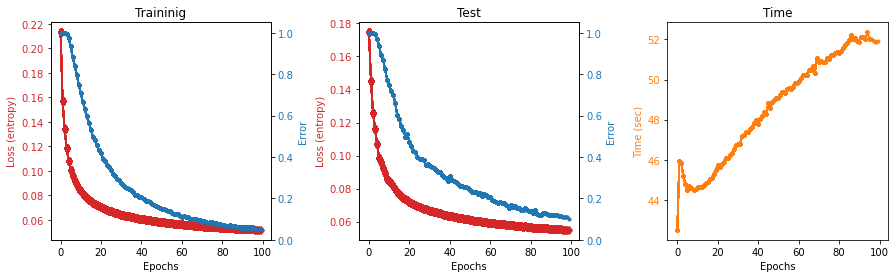

In [4]:
# SATNet-Plain with Sudoku
args["problem"] = "sudoku"
args["model"] = "SATNet-Plain"
main(**args)

In [ ]:
# SATNet-300aux with Sudoku
args["problem"] = "sudoku"
args["model"] = "SATNet-300aux"
main(**args)

In [ ]:
# SymSATNet with Sudoku
args["problem"] = "sudoku"
args["model"] = "SymSATNet"
main(**args)

In SymSATNet-Auto, we apply the parameter matrix of SATNet-Plain in 10th epoch to SymFind to get the symmetries represented by a group $G_0$ which approximates $G = (S_3 \wr S_3) \otimes (S_3 \wr S_3) \otimes S_9$ well.
For SymSATNet-Auto, we used 8K training examples and 1K validation examples, and 1K test examples.

In [ ]:
# SymSATNet-Auto
args["problem"] = "sudoku"
args["model"] = "SymSATNet-Auto"
main(**args)

### Completion Problem of Rubik's Cube
We tested the effectiveness of each model using $6 \times 6 \times 6$ Sudoku dataset.

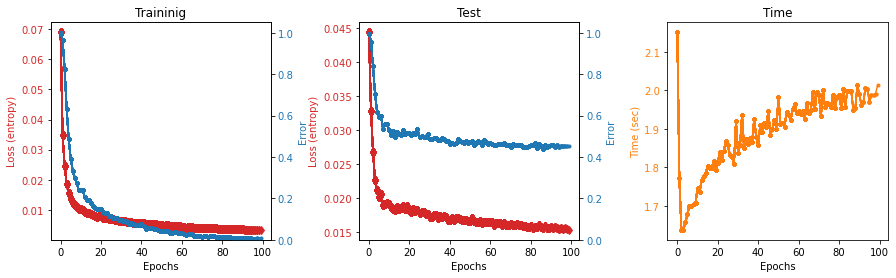

In [2]:
# SATNet-Plain
args["problem"] = "cube"
args["model"] = "SATNet-Plain"
main(**args)

In [ ]:
# SATNet-300aux
args["problem"] = "cube"
args["model"] = "SATNet-300aux"
main(**args)

In [3]:
# SymSATNet
args["problem"] = "cube"
args["model"] = "SymSATNet"
main(**args)

In [ ]:
# SymSATNet-Auto
args["problem"] = "cube"
args["model"] = "SymSATNet-Auto"
main(**args)

### Noisy Sudoku
We tested the robustness of SymSATNet and SymSATNet-Auto compared to SATNet and SATNet-300aux.

###